In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
fish_data=pd.read_csv('C:\\Users\\591664\\Downloads\\Github projects\\Multiple linear regression\\Fish.csv')

In [54]:
#EDA

fish_data.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


In [55]:
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [56]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [57]:
fish_data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [48]:
species_Data=fish_data.groupby(['Species']).max()
species_Data

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,1000.0,38.0,41.0,46.5,18.9570,6.7497
Parkki,300.0,24.0,26.0,29.0,11.3680,4.2340
Perch,1100.0,41.1,44.0,46.6,12.8002,8.1420
Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800
Roach,390.0,29.5,31.7,35.0,9.4850,5.3550
Smelt,19.9,13.8,15.0,16.2,2.9322,2.0672
Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5736


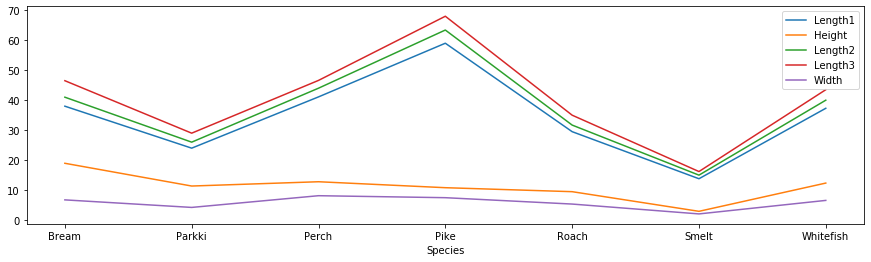

In [82]:
fig, ax = plt.subplots(figsize=(15,4))

i=['Length1','Height','Length2','Length3','Width']
for item in i:
    fish_data.groupby(['Species']).max()[item].plot(ax=ax,legend=True)
#fish_data.groupby(['Species']).max()['Length2'].ax[1,0].plot(ax=ax,legend=True,ls='..',color='yellow')
#fish_data.groupby(['Species']).max()['length3'].plot(ax=ax)
#fish_data.groupby(['Species']).max()['Height'].plot(ax=ax)
#fish_data.groupby(['Species']).max()['Width'].plot(ax=ax)

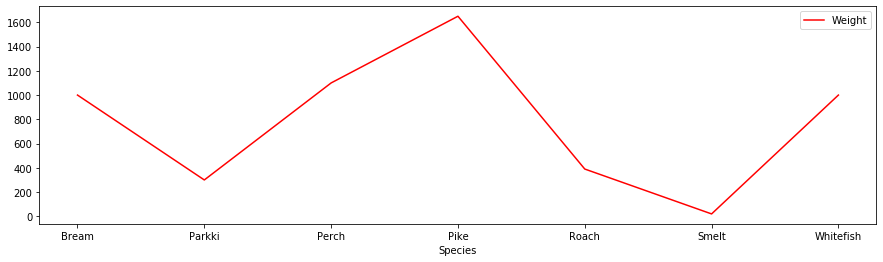

In [83]:
fig, ax = plt.subplots(figsize=(15,4))
fish_data.groupby(['Species']).max()['Weight'].plot(ax=ax,legend=True,color='red')

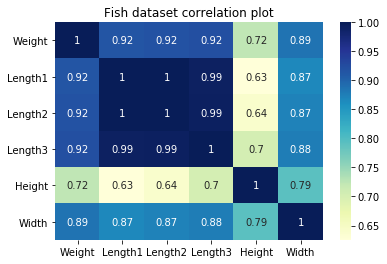

In [84]:
plt.title('Fish dataset correlation plot')
sns.heatmap(fish_data.corr(),annot=True,cmap='YlGnBu')

In [85]:
all_col_f=fish_data.columns
num_cols=fish_data._get_numeric_data().columns.to_list()
cat_cols=list(set(all_col_f)-set(num_cols))

X=fish_data[num_cols].values
y=fish_data[cat_cols].values

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25)

In [87]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state =62)
logistic_classifier.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=62, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
y_pred=logistic_classifier.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  1,  0,  0],
       [ 0,  0,  1,  2,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  3,  0,  0,  0,  0]], dtype=int64)

In [90]:
logistic_classifier.score(X_test,y_test)

0.725